<img src="download.jpeg" alt="Alt Text" width="900" align="center">

# TASK 1
## Project Title: Bank Churn Prediction using Machine Learning

### Overview:

##### In this project, we aim to predict customer churn for a bank using machine learning techniques. Customer churn refers to the phenomenon where customers stop doing business with a company. Predicting churn is crucial for businesses, as it allows them to take proactive measures to retain customers and reduce revenue loss.

### Objective:

##### The main objective of this project is to develop a predictive model that can accurately identify whether a customer is likely to churn or not. We will use a variety of features such as customer demographics, banking behavior, and historical data to build and train our predictive models.

In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [281]:
data = pd.read_csv("Churn_Modelling.csv")

# Display Top 5 Rows of Dataset

In [282]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Check Last 5 Rows of Dataset

In [283]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Find The Shape Of Our Dataset

In [284]:
data.shape

(10000, 14)

In [285]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 10000
Number of Columns 14


# Droping Irrelevant Features

In [286]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Get Information about Dataset

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Check Null Values

In [288]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [289]:
data.duplicated().sum()

0

In [290]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Statistics About The Dataset

In [291]:
data.describe(include="all")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# Exploratory Data Analysis

### Check Valuecounts of features

In [292]:
clmn = ['Geography','Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']

In [293]:
for i in clmn:
    print("********************")
    print(i,":")    
    print(data[i].value_counts())

********************
Geography :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
********************
Gender :
Male      5457
Female    4543
Name: Gender, dtype: int64
********************
Tenure :
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
********************
NumOfProducts :
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
********************
HasCrCard :
1    7055
0    2945
Name: HasCrCard, dtype: int64
********************
IsActiveMember :
1    5151
0    4849
Name: IsActiveMember, dtype: int64


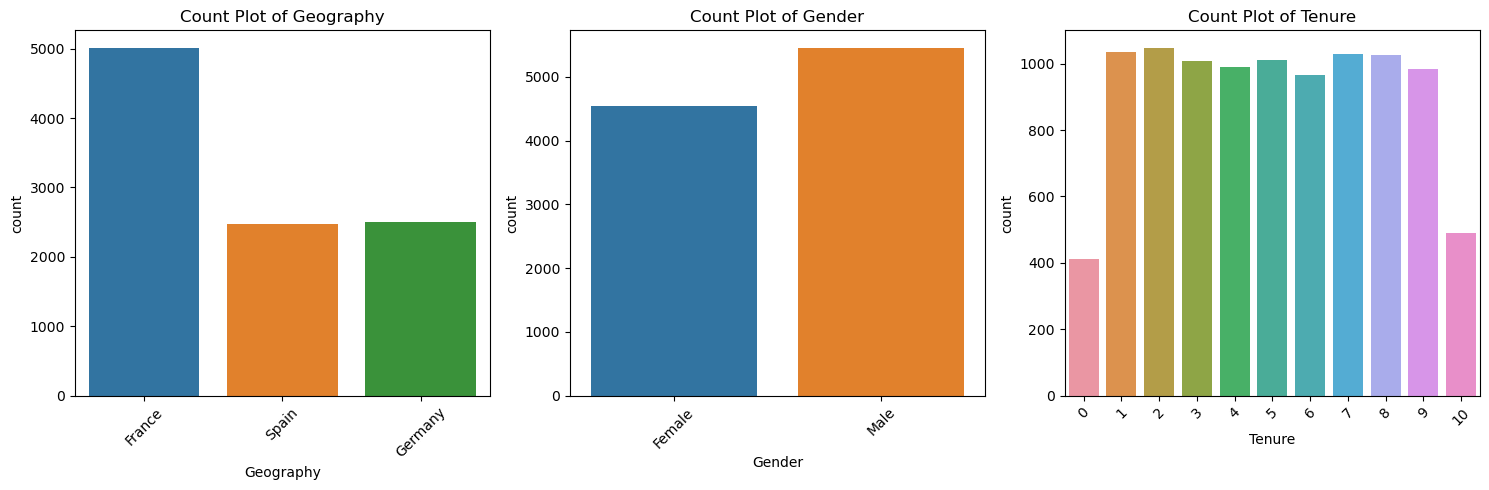

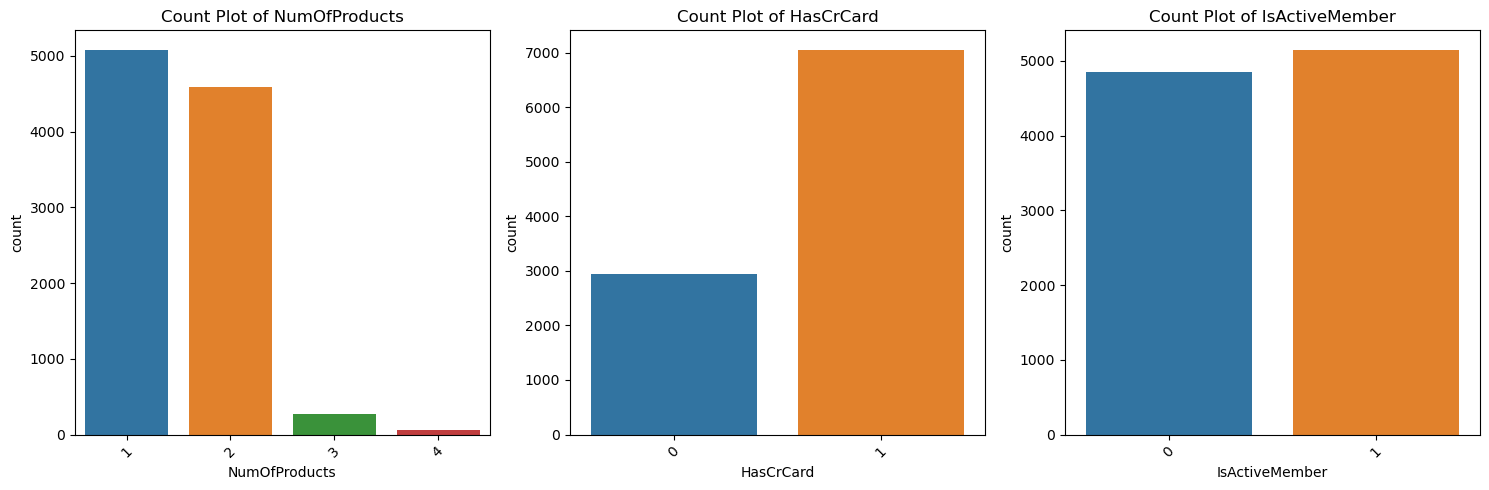

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

  # Replace with your actual column names

num_columns = len(clmn)
num_plots_per_row = 3  # Number of plots to display in each row

for i in range(0, len(clmn), num_plots_per_row):
    plt.figure(figsize=(15, 5))  # Set the figure size
    for j, col in enumerate(clmn[i:i+num_plots_per_row]):
        plt.subplot(1, num_plots_per_row, j+1)
        sns.countplot(data=data, x=col)  # Create the count plot
        plt.title(f"Count Plot of {col}")
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()  # Display the row of plots

### Relation with categorical features

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

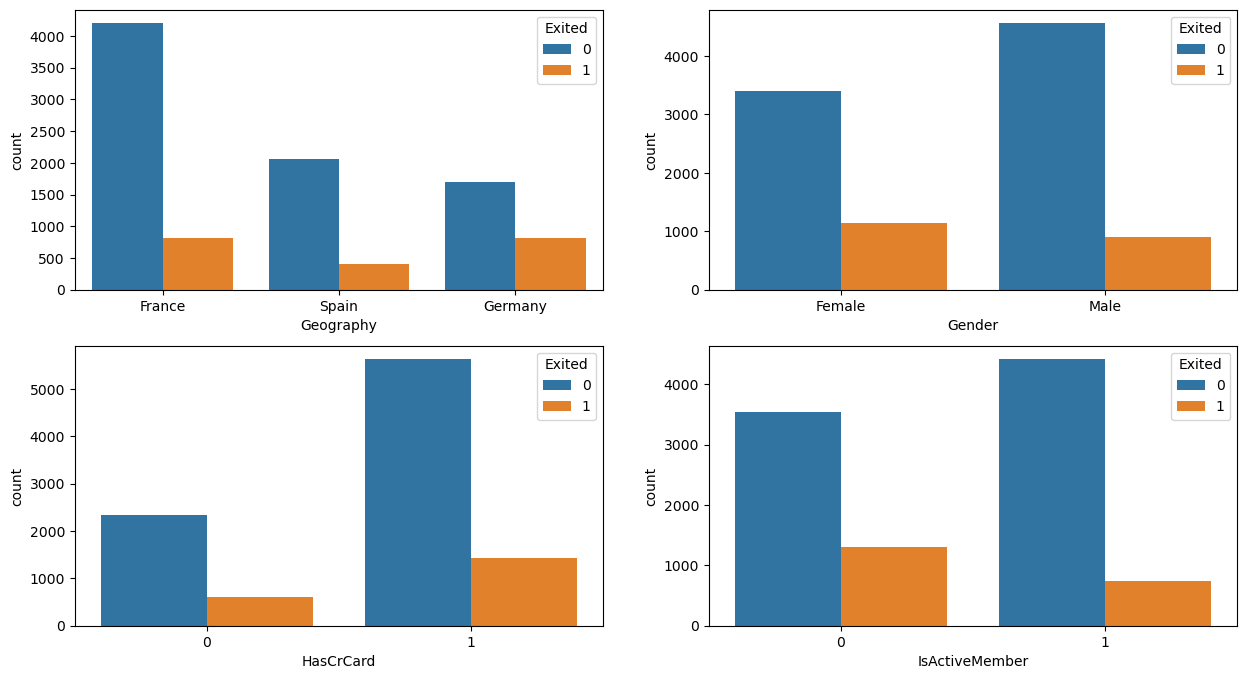

In [295]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(15, 8))
    sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

### Histograms for numerical features
### Visualizing Numerical Feature Distributions
#### To understand the distribution of numerical features in relation to the target variable Exited, we can use histograms. The following code generates a series of histograms for the features CreditScore, Age, Tenure, Balance, NumOfProducts, and EstimatedSalary.

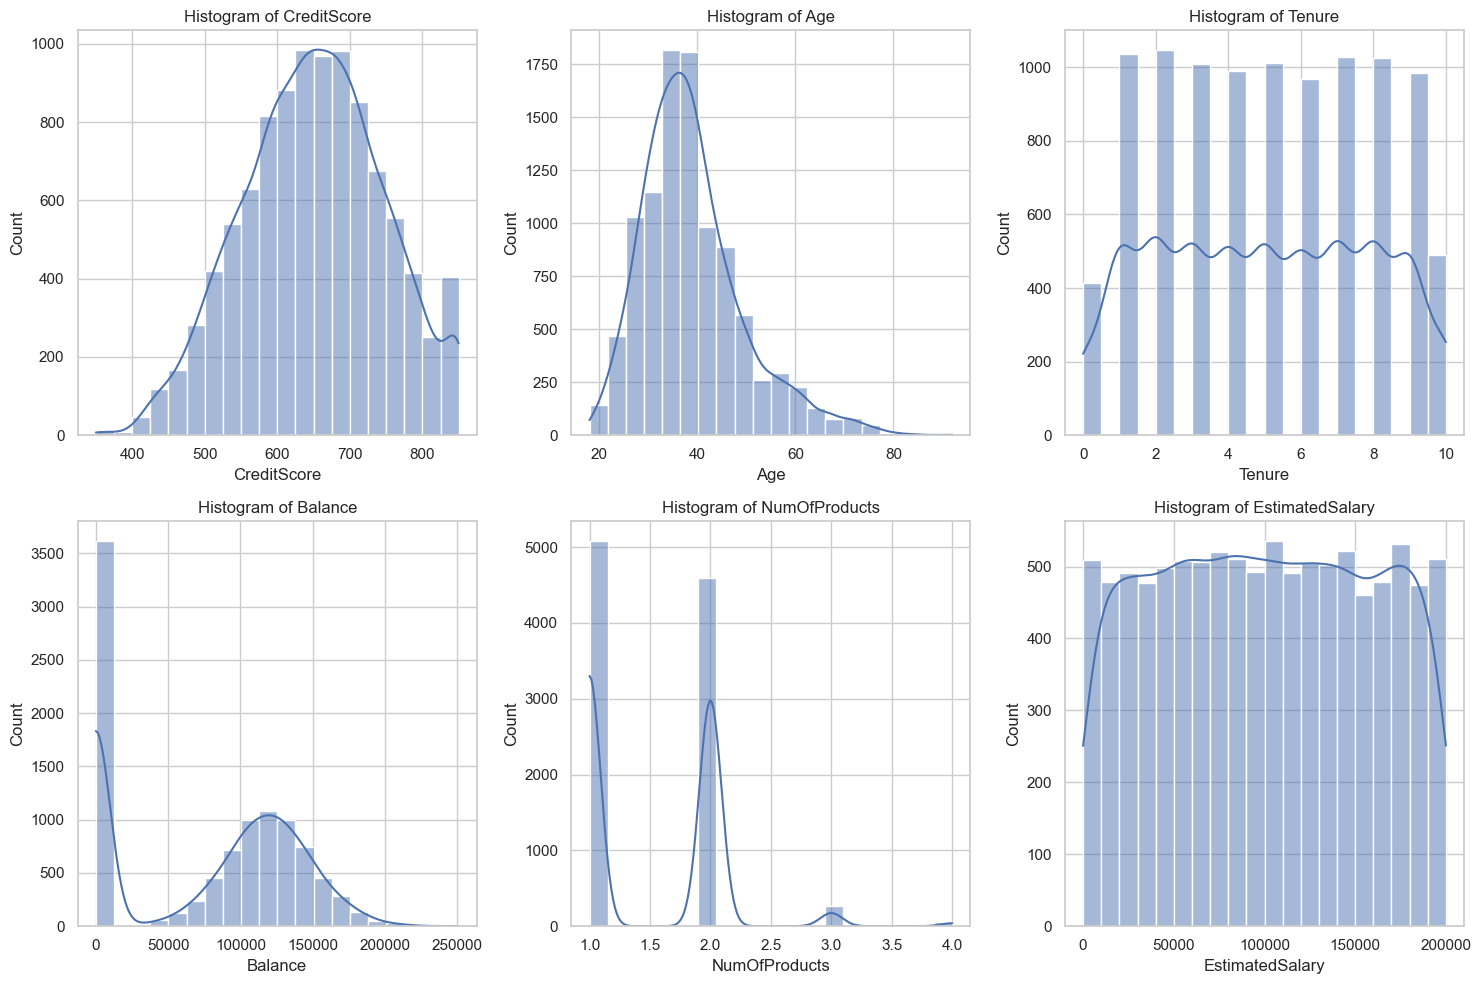

In [303]:

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


### Bar Plots:
#### For categorical features (Geography, Gender, HasCrCard, IsActiveMember),
#### use bar plots to compare the proportion of each category within each class of the target.
#### Stacked bar plots can be used to visualize the percentage of each category for each class.

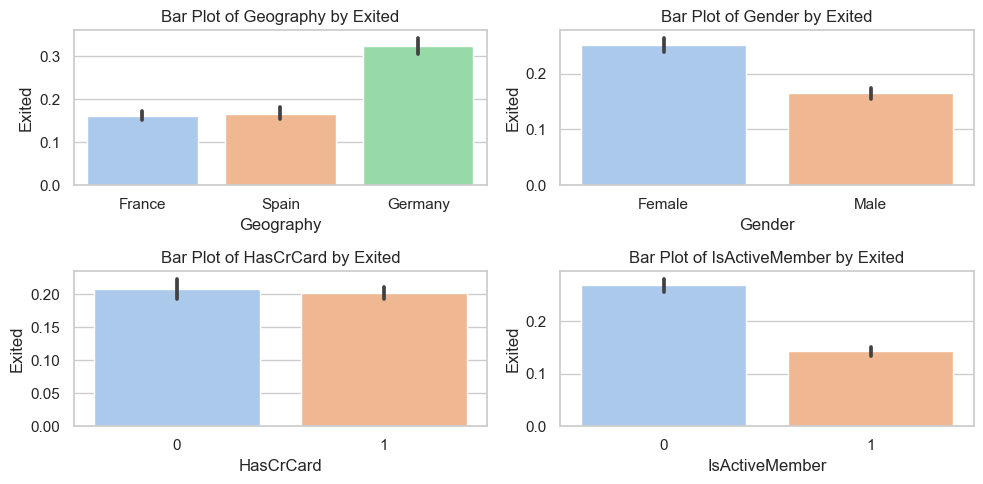

In [355]:
plt.figure(figsize=(10, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=data, x=feature, y='Exited',)
    plt.title(f'Bar Plot of {feature} by Exited')
plt.tight_layout()
plt.show()

### Correlation Heatmap:
#### To visualize the correlation between all features (including numerical and encoded categorical) and the target variable, you can create a correlation heatmap.

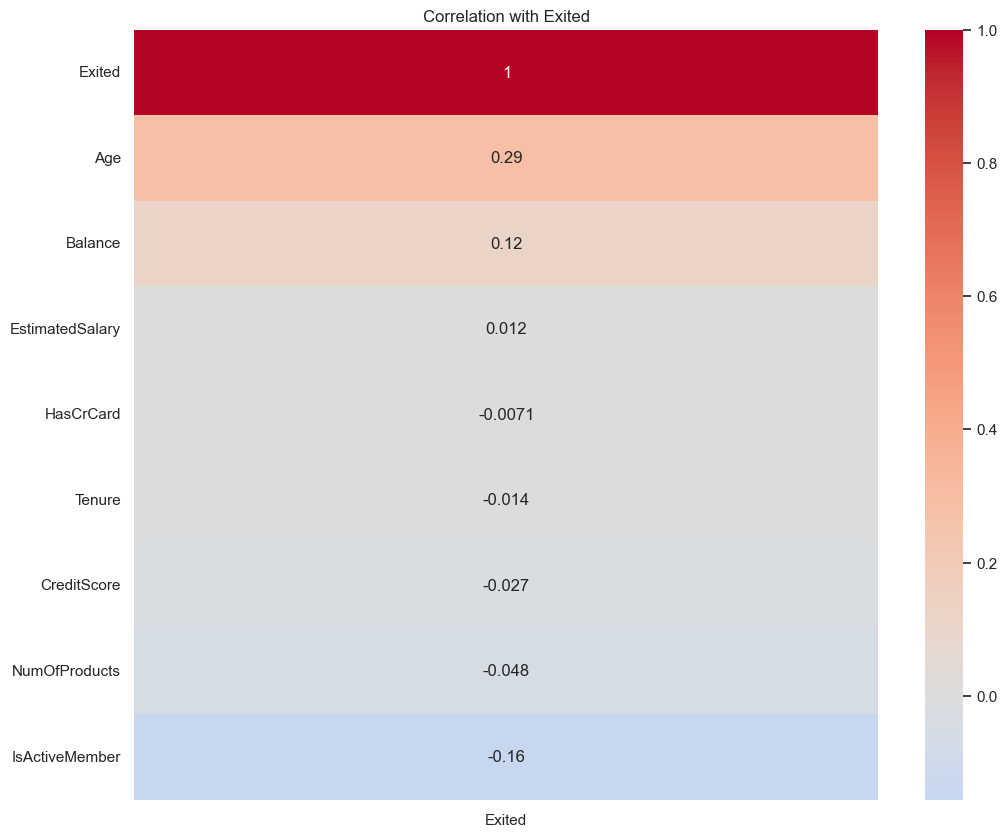

In [305]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix[['Exited']].sort_values(by='Exited', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Exited')
plt.show()

# Encoding Categorical Features

In [212]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [213]:
data = pd.get_dummies(data, drop_first=True)

In [214]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Handling Imbalanced Data With SMOTE

### To check the give dataset is balanced or not

In [215]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### vizualize the counts

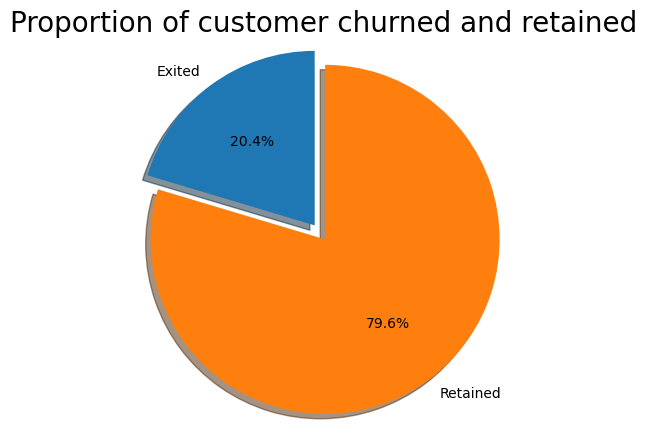

In [216]:
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

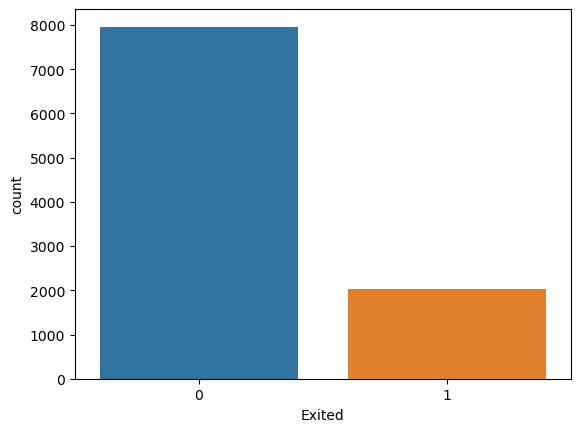

In [217]:
sns.countplot(data['Exited'])

In [218]:
x = data.drop('Exited', axis=1)
y = data['Exited']

In [219]:
from imblearn.over_sampling import SMOTE

In [220]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [221]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# Splitting The Dataset Into Training and Test Set

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42,)

# Feature Scaling

In [224]:
from sklearn.preprocessing import StandardScaler

In [225]:
sc = StandardScaler()

In [226]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression


In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
log = LogisticRegression()

In [229]:
log.fit(x_train,y_train)

LogisticRegression()

In [230]:
y_pred1 = log.predict(x_test)

In [321]:
report = classification_report(y_test, y_pred1)

print("Classification Report for Logistic Regression Algorithm:\n")
print(report)

Classification Report for Logistic Regression Algorithm:

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1633
           1       0.77      0.79      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



# SVC

In [237]:
from sklearn import svm

In [238]:
svm = svm.SVC()

In [239]:
svm.fit(x_train,y_train)

SVC()

In [240]:
y_pred2 = svm.predict(x_test)

In [313]:
report = classification_report(y_test, y_pred2)

print("Classification Report for SVC Algorithm:\n")

print(report)

Classification Report for SVC Algorithm:

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1633
           1       0.83      0.86      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



# KNeighbors Classifier

In [243]:
from sklearn.neighbors import KNeighborsClassifier

In [244]:
knn = KNeighborsClassifier()

In [245]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [246]:
y_pred3 = knn.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [314]:
report = classification_report(y_test, y_pred3)

print("Classification Report for KNeighbors Classifier Algorithm:\n")

print(report)

Classification Report for KNeighbors Classifier Algorithm:

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1633
           1       0.79      0.84      0.82      1553

    accuracy                           0.81      3186
   macro avg       0.82      0.82      0.81      3186
weighted avg       0.82      0.81      0.81      3186



# Decision Tree Classifier

In [249]:
from sklearn.tree import DecisionTreeClassifier

In [250]:
dt = DecisionTreeClassifier()

In [251]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [252]:
y_pred4 = dt.predict(x_test)

In [315]:
report = classification_report(y_test, y_pred4)

print("Classification Report for Decision Tree Classifier Algorithm:\n")

print(report)

Classification Report for Decision Tree Classifier Algorithm:

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1633
           1       0.77      0.83      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



# Random Forest Classifier

In [255]:
from sklearn.ensemble import RandomForestClassifier

In [256]:
rf = RandomForestClassifier()

In [257]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [258]:
y_pred5 = rf.predict(x_test)

In [316]:
report = classification_report(y_test, y_pred5)

print("Classification Report for Random Forest Classifier Algorithm:\n")

print(report)

Classification Report for Random Forest Classifier Algorithm:

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1633
           1       0.85      0.88      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



# GradientBoostingClassifier

In [261]:
from sklearn.ensemble import GradientBoostingClassifier

In [262]:
gb = GradientBoostingClassifier()

In [263]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [264]:
y_pred6 = gb.predict(x_test)

In [317]:
report = classification_report(y_test, y_pred6)

print("Classification Report for GradientBoostingClassifier Algorithm:\n")

print(report)

Classification Report for GradientBoostingClassifier Algorithm:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1633
           1       0.84      0.85      0.84      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [319]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})

final_data

,Models,ACC
0,LR,0.782172
1,SVC,0.842750
2,KNN,0.814815
3,DT,0.796296
4,RF,0.862837
5,GBC,0.845574


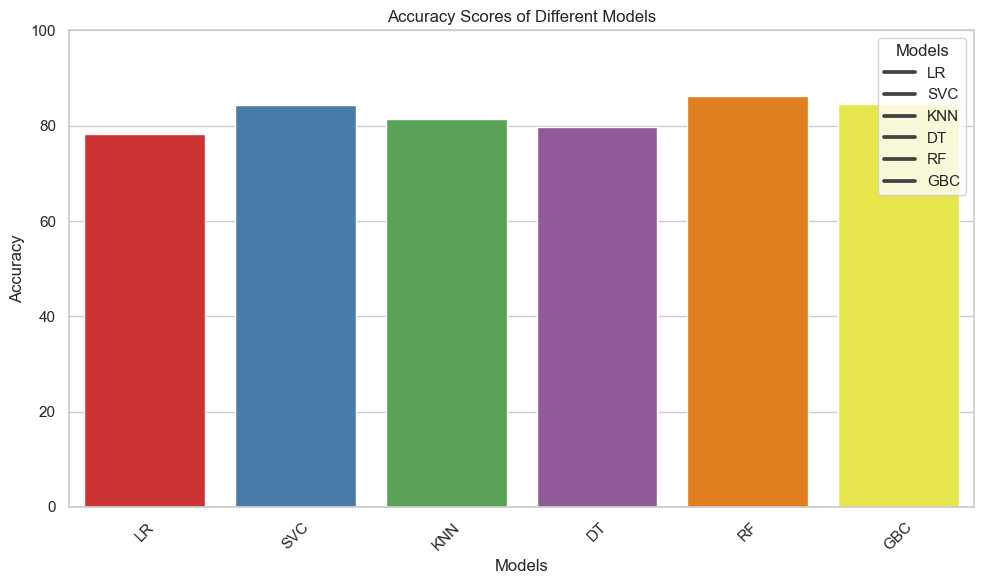

In [339]:
# Define a custom color palette
custom_palette = sns.color_palette("Set1")

plt.figure(figsize=(10, 6))
# Use the 'palette' parameter to assign the custom color palette
sns.barplot(data=final_data, x='Models', y=final_data['ACC']*100, palette=custom_palette)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0.0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Models', labels=final_data['Models'])
plt.show()

In [344]:
max_accuracy_model = final_data.loc[final_data["ACC"].idxmax(), "Models"]

print("Model with Maximum Accuracy:", max_accuracy_model,":",max(final_data["ACC"]))

Model with Maximum Accuracy: RF : 0.8628374136848713


# Save The Model

In [345]:
x_res = sc.fit_transform(x_res)

In [346]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [347]:
import joblib

In [348]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [349]:
joblib.load('churn_predict_model')

RandomForestClassifier()

In [350]:
model = joblib.load('churn_predict_model')

In [351]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [352]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

# *************************************END***************************************************